<a href="https://colab.research.google.com/github/migot01/Linear-Regression-with-sklearn/blob/master/simple_linear_regression_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.linear_model import LinearRegression

In [0]:
#this loads the spreadsheet from google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials


from IPython.display import display
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open('test_data')
sheet = worksheet.sheet1 #choose the first sheet
import pandas
data = pandas.DataFrame(sheet.get_all_records())

In [0]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [0]:
x = data['SAT']
y = data['GPA']

In [0]:
x.shape

(84,)

In [0]:
y.shape

(84,)

In [0]:
x_matrix = x.values.reshape(-1, 1)

In [0]:
reg = LinearRegression()
reg.fit (x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# R-squared
reg.score(x_matrix, y)

0.40600391479679754

In [0]:
#coefficients
reg.coef_


array([0.00165569])

In [0]:
# intercept
reg.intercept_

0.2750402996602799

In [0]:
reg.predict([[1740]])

array([3.15593751])

In [0]:
new_data = pd.DataFrame(data=[1740,1758],columns=['SAT'])
new_data

,SAT
0,1740
1,1758


In [0]:
reg.predict(new_data)

array([3.15593751, 3.18573989])

In [0]:
new_data['predicted_gpa'] = reg.predict(new_data)

In [0]:
new_data

,SAT,predicted_gpa
0,1740,3.155938
1,1758,3.185740


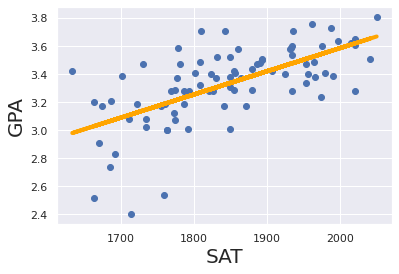

In [0]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
#yhat = 0.0017*x + 0.275
fig = plt.plot(x,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()